<a href="https://colab.research.google.com/github/PrabhaRajesh/Search_engine/blob/main/Diabeties_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
db = pd.read_csv('/diabetes2.csv')

In [ ]:
db.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Text(0, 0.5, 'Number of People')

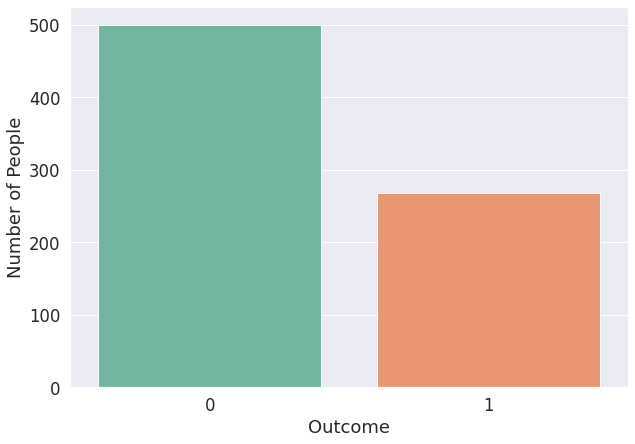

In [ ]:
plt.figure(figsize=(10,7))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Outcome', data=db , palette = "Set2")
plt.ylabel('Number of People')

In [ ]:
db['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

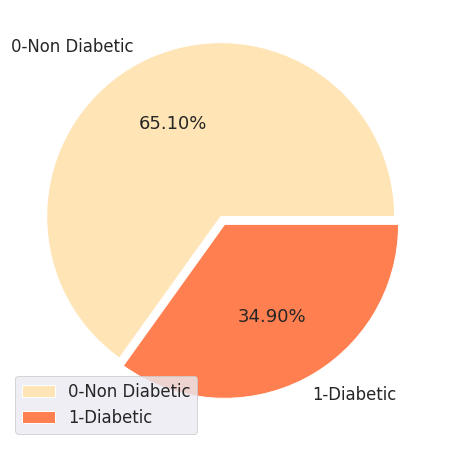

In [ ]:
plt.figure(figsize=(8,8))
piec = db['Outcome'].value_counts()
explode = (0.05,0)
colors = ['moccasin','coral']
labels = ['0-Non Diabetic','1-Diabetic']
sns.set(font_scale = 1.5)
plt.pie(piec, labels = ('0-Non Diabetic','1-Diabetic'),autopct = "%.2f%%", explode = explode, colors = colors)
plt.legend(labels, loc = 'lower left')

In [ ]:
db_copy = db.copy(deep = True)

In [ ]:
db_copy[['Pregnancies','BloodPressure','SkinThickness','Insulin','BMI']] = db_copy[['Pregnancies','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(db_copy.isnull().sum())

Pregnancies                 111
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f23770b0e90>,
      dtype=object)

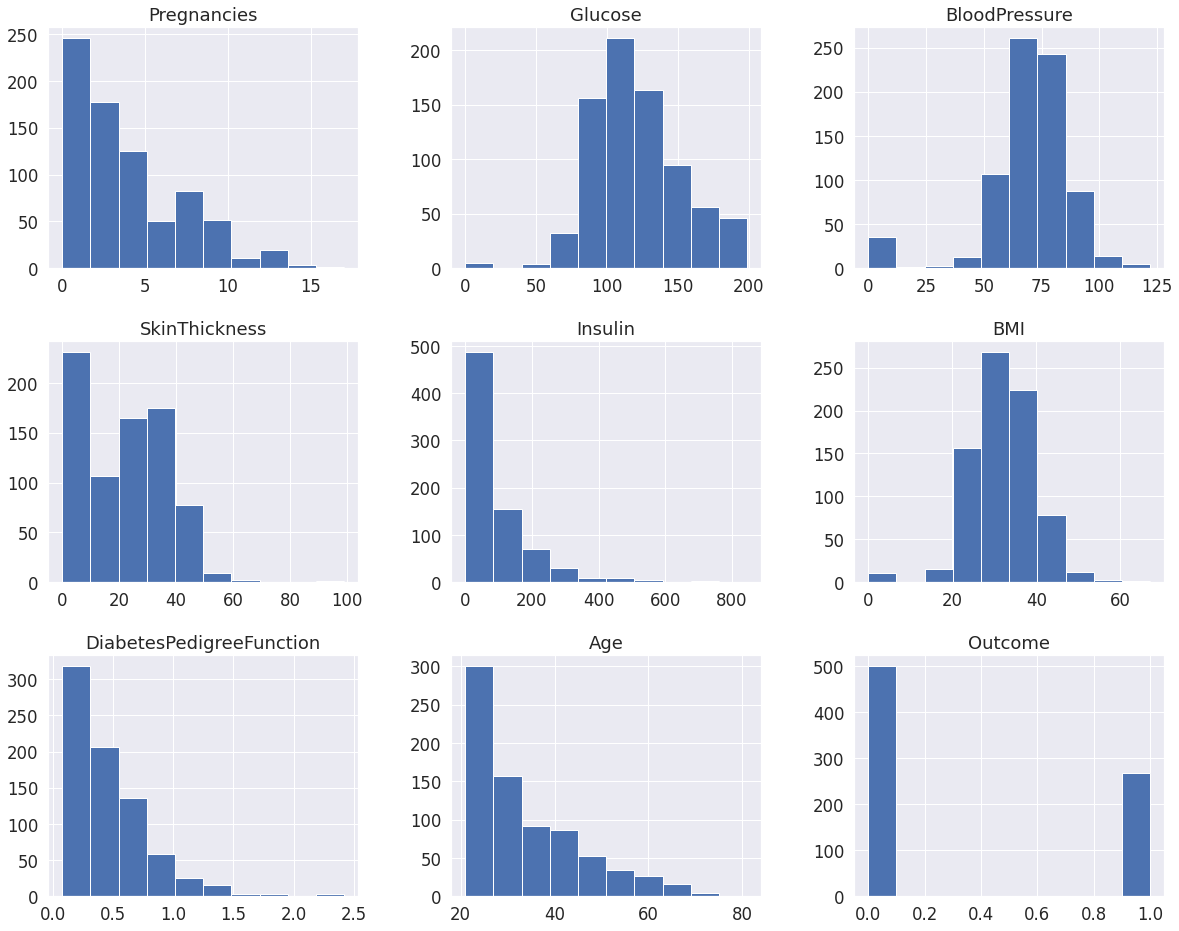

In [ ]:
db.hist(figsize = (20,16),grid=True)

#Decision Tree Classifier

In [ ]:
dataset= pd.read_csv('/diabetes2.csv')
X = dataset.iloc[:,0:8].values
y = dataset.iloc[:, 8].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


In [ ]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7316017316017316
